In [28]:
# P4, implementation of Broyden's method
using LinearAlgebra

function broydens(x0, F, J, random_start, tol=1e-8, maxit=100)
    #== Alg. 10.2 in Text, assuming access to J. ==#
    if random_start == true
        # generate random start
        x0 = rand(Float64, (length(x0), 1));
    end
    N = length(x0);
    all_x = zeros(N, maxit);
    all_x[:, 1] = x0;
    all_err = [];
    x_curr = x0;
    v = F(x_curr);
    A = inv(J(x_curr));
    s = -A*v;
    x_curr = x_curr + s;
    num_it = 2;
    all_x[:, 2] = x_curr;
    while (num_it <= maxit)
        w = v;
        v = F(x_curr);
        y = v - w;
        z = -A*y;
        p = -transpose(s)*z;
        u = transpose(transpose(s)*A);
        A = A + (1/p)*(s+z)*transpose(u);
        s = -A*v;
        # update x
        x_curr = x_curr + s;
        # save x
        num_it += 1;
        i = num_it;
        all_x[:, i] = x_curr;
        err = norm(s);
        all_err = append!(all_err, err);
        if err < tol
            println("===== converged. ");
            all_err = append!(all_err, err);
            break
        end
    end
    return all_x[:, 1:num_it], all_err
end

# ==== functions in Problem 4
function F(x)
    #== input: 4x1 vector ==# 
    x1, x2, x3, x4 = x;
    return [4*x1-x2+x3-x1*x4; -x1+3*x2-2*x3-x2*x4; x1-2*x2+3*x3-x3*x4; x1^2+x2^2+x3^2-1];
end

function J(x)
    #=== Jacobian: 4 x 4, input 4 x 1. ===#
    x1, x2, x3, x4 = x;
    Jx = zeros(4, 4);
    Jx[1, 1] = 4-x4;
    Jx[1, 2] = -1; 
    Jx[1, 3] = 1;
    Jx[1, 4] = -x1;
    Jx[2, 1] = -1;
    Jx[2, 2] = 3-x4;
    Jx[2, 3] = -2;
    Jx[2, 4] = -x2;
    Jx[3, 1] = 1;
    Jx[3, 2] = -2;
    Jx[3, 3] = 3-x4;
    Jx[3, 4] = -x3;
    Jx[4, 1] = 2*x1;
    Jx[4, 2] = 2*x2;
    Jx[4, 3] = 2*x3;
    Jx[4, 4] = 0;
    return Jx;
end

J (generic function with 1 method)

In [29]:
x_history, errors = broydens([1;1;1;1], F, J, true);

===== converged. 


In [30]:
x_history

4×50 Matrix{Float64}:
 0.625478    1.08672     0.898825  -1.1153   …  -5.58668e-11   1.54809e-14
 0.0375685   0.455422    1.00727    2.88394     -0.707107     -0.707107
 0.0267659  -0.00577733  0.385281   3.34746     -0.707107     -0.707107
 0.147917    6.10327     2.73689   -2.17375      1.0           1.0

In [31]:
last_sol = x_history[:,end]

4-element Vector{Float64}:
  1.5480908578395253e-14
 -0.7071067811865902
 -0.7071067811866502
  1.0000000000003826

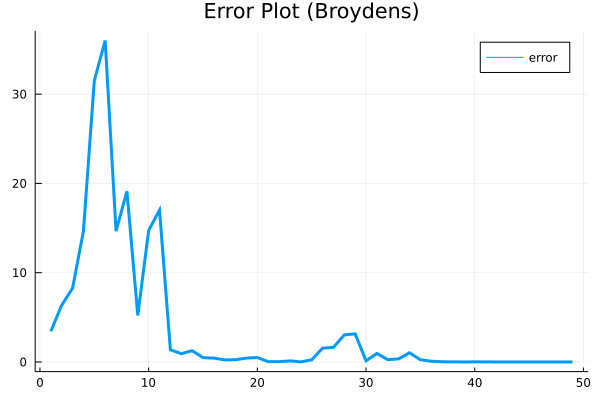

In [45]:
using Plots
plot(1:length(errors), errors, title="Error Plot (Broydens)",
label="error", lw=3)

In [60]:
# sol2
x_history2, errors2 = broydens([1;0;0;0], F, J, false);

===== converged. 


In [61]:
x_history2

4×16 Matrix{Float64}:
 1.0   1.0   0.964129   0.783924  …   0.816497   0.816497   0.816497
 0.0   0.2   0.321963   0.471895      0.408248   0.408248   0.408248
 0.0  -0.2  -0.321963  -0.471895     -0.408248  -0.408248  -0.408248
 0.0   3.6   3.21259    2.50816       3.0        3.0        3.0

In [62]:
last_sol = x_history2[:,end]

4-element Vector{Float64}:
  0.816496580928769
  0.4082482907394642
 -0.4082482901875766
  2.999999999999557

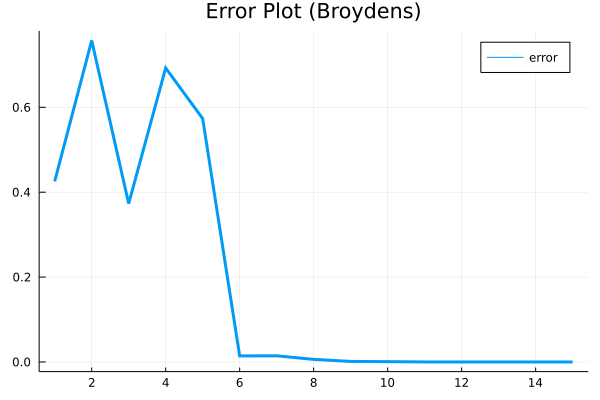

In [63]:
plot(1:length(errors2), errors2, title="Error Plot (Broydens)",
label="error", lw=3)

In [140]:
# sol3
x_history3, errors3 = broydens([0;0.1;10;10], F, J, false);

===== converged. 


In [141]:
x_history3

4×23 Matrix{Float64}:
  0.0   1.10445   1.64186   1.92365  …   0.57735   0.57735   0.57735
  0.1  -1.56061  -2.07763  -2.08219     -0.57735  -0.57735  -0.57735
 10.0   5.06611   3.18996   1.42295      0.57735   0.57735   0.57735
 10.0   6.87629   6.29913   6.36767      6.0       6.0       6.0

In [142]:
last_sol = x_history3[:,end]

4-element Vector{Float64}:
  0.5773502691959138
 -0.5773502691895835
  0.5773502691900773
  5.999999999995131

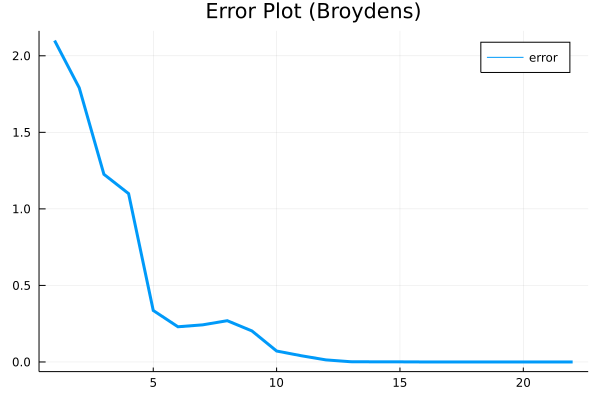

In [143]:
plot(1:length(errors3), errors3, title="Error Plot (Broydens)",
label="error", lw=3)